# TPE - FUNDAMENTOS DE LA CIENCIA DE DATOS - 2025 
## ONLINE SHOPPERS INTENTION DATASET

Autores: Cisilino Bautista y Abraham Simon

#### Apertura y analisis preeliminar del dataset.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats  




# leemos los datos del archivo
dataset_compras = pd.read_csv("online_shoppers_intention.csv")
dataset_compras.head()



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Mostramos los primeros 5 registros/muestras del dataset, para ver con que variables nos encontrabamos, el tipo y los posibles valores que podrian tomar.

In [33]:
dataset_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [34]:
dataset_compras.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Graficamos la variable mas importante del dataset para ver como se distribuye

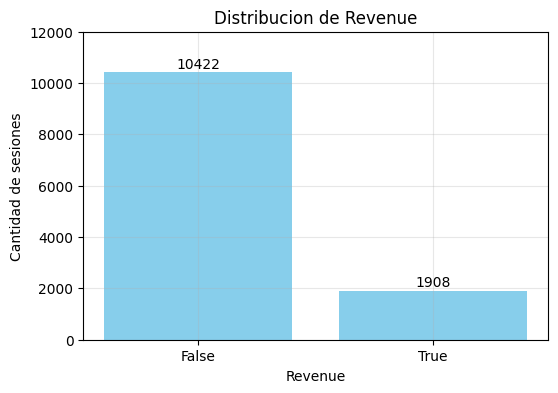



En porcentajes:
Revenue
False    84.53%
True     15.47%
Name: proportion, dtype: object


In [35]:
# Contar valores
counts = dataset_compras["Revenue"].value_counts().sort_index()

# Graficar
plt.figure(figsize=(6, 4))
bars = plt.bar(counts.index.astype(str), counts.values,color = ["skyblue"])
plt.title(f"Distribucion de Revenue")
plt.ylabel("Cantidad de sesiones")
plt.xlabel("Revenue")
plt.xticks(rotation=0)
plt.ylim(0, 12000) 
# etiquetas de valor encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f"{int(height)}", ha="center", va="bottom", fontsize=10)

plt.grid(True, alpha=0.3)
plt.show()
print("\n")
print("En porcentajes:")
porcentajes = round(dataset_compras["Revenue"].value_counts(normalize=True) * 100, 2)
print(porcentajes.astype(str) + "%")

Continuamos graficando las variables categoricas (codificadas como numericas) del dataset para concocer sus posibles valores :

- OperatingSystems

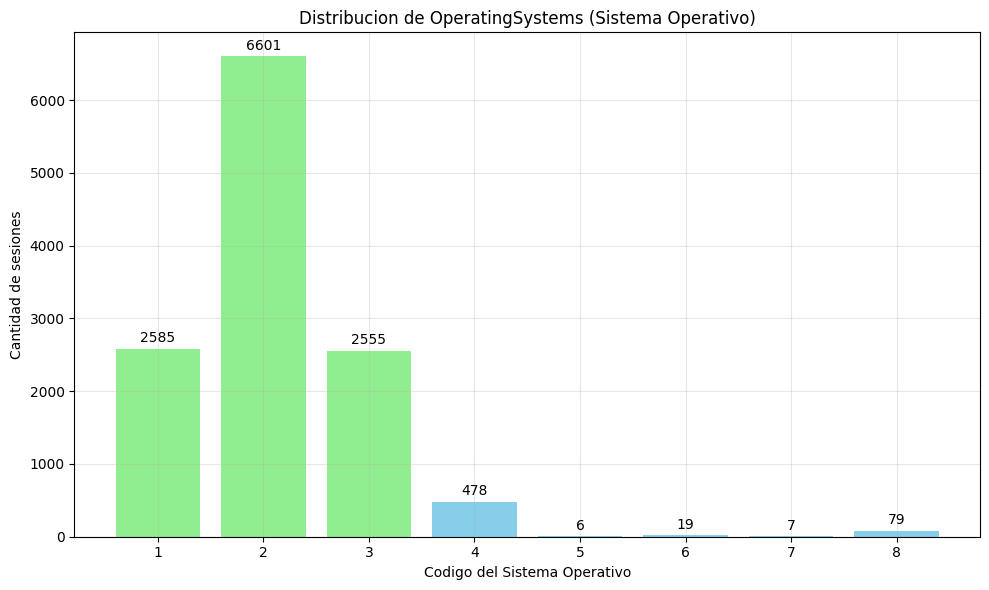

In [36]:

# Contar frecuencias
os_counts = dataset_compras["OperatingSystems"].value_counts().sort_index()

# Graficar en barras verticales
plt.figure(figsize=(10, 6))
bars = plt.bar(os_counts.index.astype(str), os_counts.values, color = ["skyblue"])
plt.title("Distribucion de OperatingSystems (Sistema Operativo)")
plt.xlabel("Codigo del Sistema Operativo")
plt.ylabel("Cantidad de sesiones")
plt.xticks(rotation=0)

bars = plt.bar(os_counts.index.astype(str), os_counts.values, color="skyblue")
for b in bars[:3]:
    b.set_facecolor("lightgreen")

# etiquetas de valor encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f"{int(height)}", ha="center", va="bottom", fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


- TrafficType

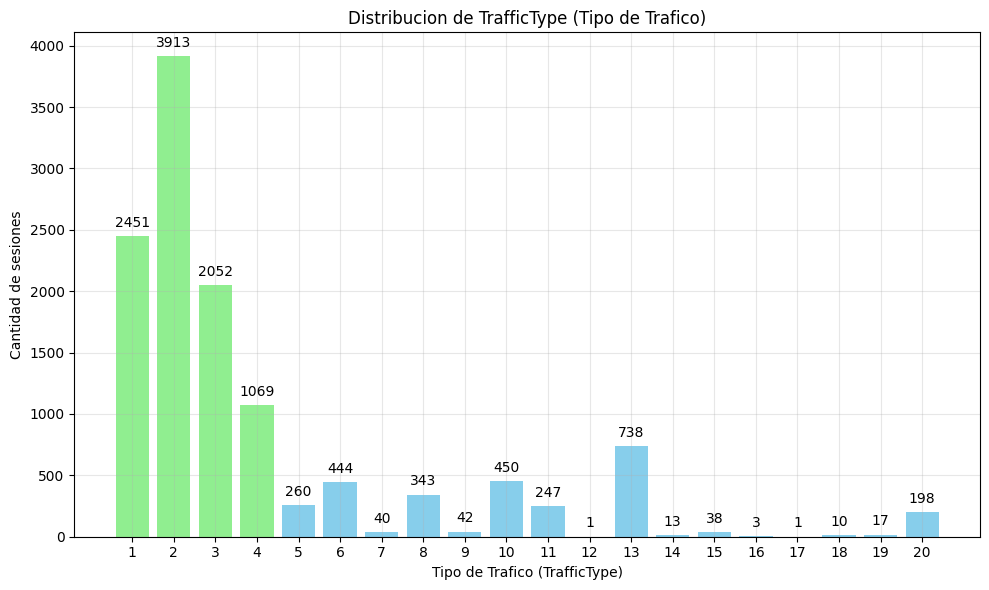

In [37]:
# Contar frecuencias
traffic_counts = dataset_compras["TrafficType"].value_counts().sort_index()

# Graficar en barras verticales
plt.figure(figsize=(10, 6))
bars = plt.bar(traffic_counts.index.astype(str), traffic_counts.values, color = ["skyblue"])
plt.title("Distribucion de TrafficType (Tipo de Trafico)")
plt.xlabel("Tipo de Trafico (TrafficType)")
plt.ylabel("Cantidad de sesiones")
plt.xticks(rotation=0)

# pintamos las primeras 4 barras que son las mas significativas.
bars = plt.bar(traffic_counts.index.astype(str), traffic_counts.values, color="skyblue")
for b in bars[:4]:
    b.set_facecolor("lightgreen")

# etiquetas de valor encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f"{int(height)}", ha="center", va="bottom", fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


- Region

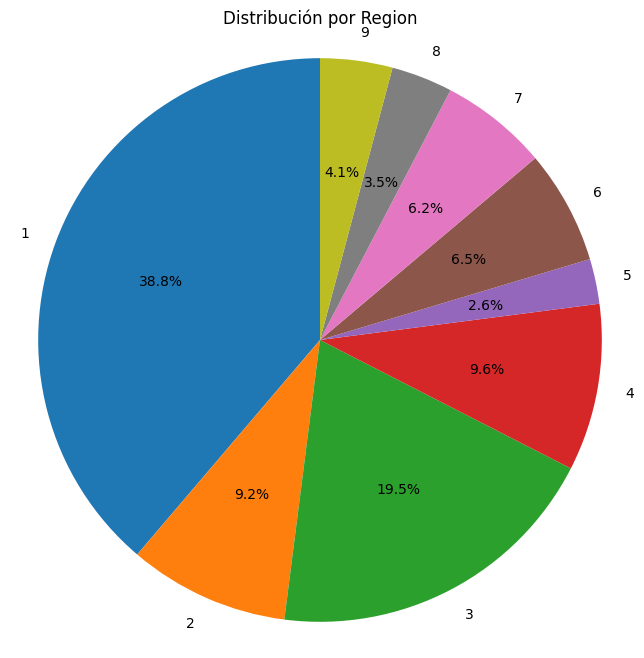

In [38]:

# Contar frecuencias
region_counts = dataset_compras["Region"].value_counts().sort_index()

# Graficar
plt.figure(figsize=(8, 8))
plt.pie(region_counts.values, labels=region_counts.index.astype(str), autopct="%1.1f%%", startangle=90)
plt.title("Distribución por Region")
plt.axis("equal") 
plt.show()

- Browser

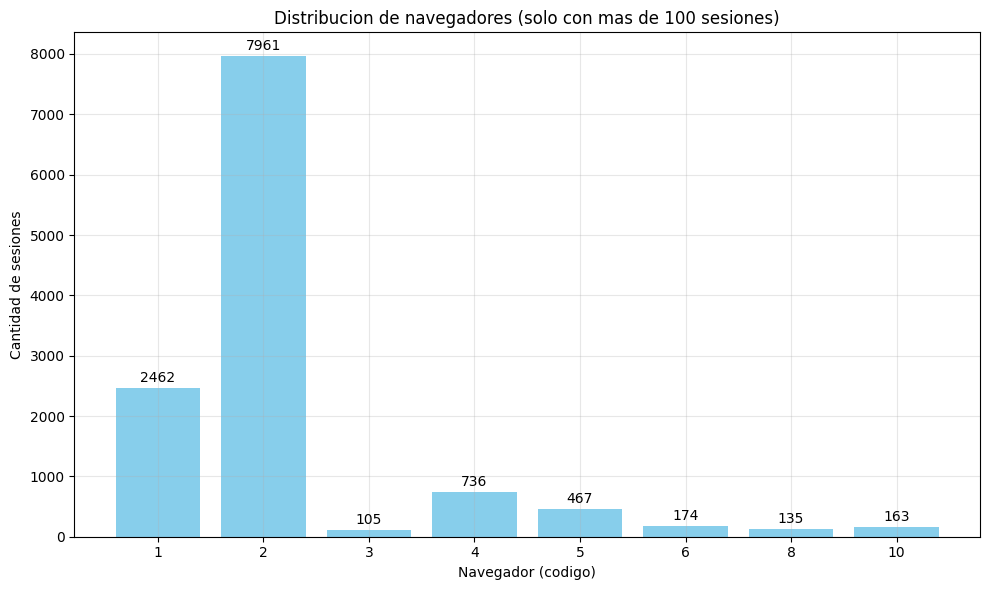

In [39]:

# Contar frecuencias
browser_counts = dataset_compras["Browser"].value_counts().sort_index()
# Filtrar solo los navegadores con más de 100 sesiones
browser_significativos = browser_counts[browser_counts > 100]

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(browser_significativos.index.astype(str), browser_significativos.values, color = ["skyblue"])
plt.title("Distribucion de navegadores (solo con mas de 100 sesiones)")
plt.xlabel("Navegador (codigo)")
plt.ylabel("Cantidad de sesiones")
plt.xticks(rotation=0)

# etiquetas de valor encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f"{int(height)}", ha="center", va="bottom", fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


- Weekend

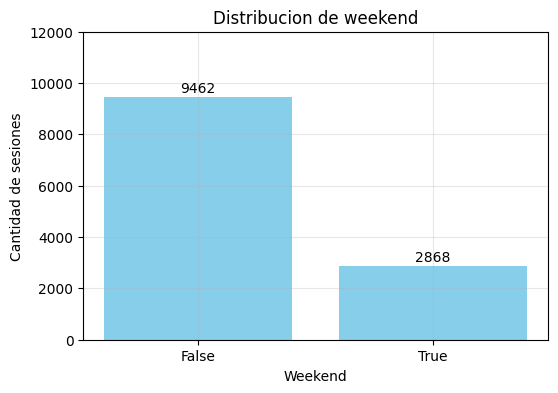



En porcentajes:
Weekend
False    76.74%
True     23.26%
Name: proportion, dtype: object


In [40]:

# Contar valores
counts = dataset_compras["Weekend"].value_counts().sort_index()

# Graficar
plt.figure(figsize=(6, 4))
bars = plt.bar(counts.index.astype(str), counts.values, color = ["skyblue"])
plt.title(f"Distribucion de weekend")
plt.ylabel("Cantidad de sesiones")
plt.xlabel("Weekend")
plt.xticks(rotation=0)
plt.ylim(0, 12000) 
# etiquetas de valor encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f"{int(height)}", ha="center", va="bottom", fontsize=10)

plt.grid(True, alpha=0.3)
plt.show()
print("\n")
print("En porcentajes:")
porcentajes = round(dataset_compras["Weekend"].value_counts(normalize=True) * 100, 2)
print(porcentajes.astype(str) + "%")

- Month

que meses estan codificados?

In [41]:
dataset_compras["Month"].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

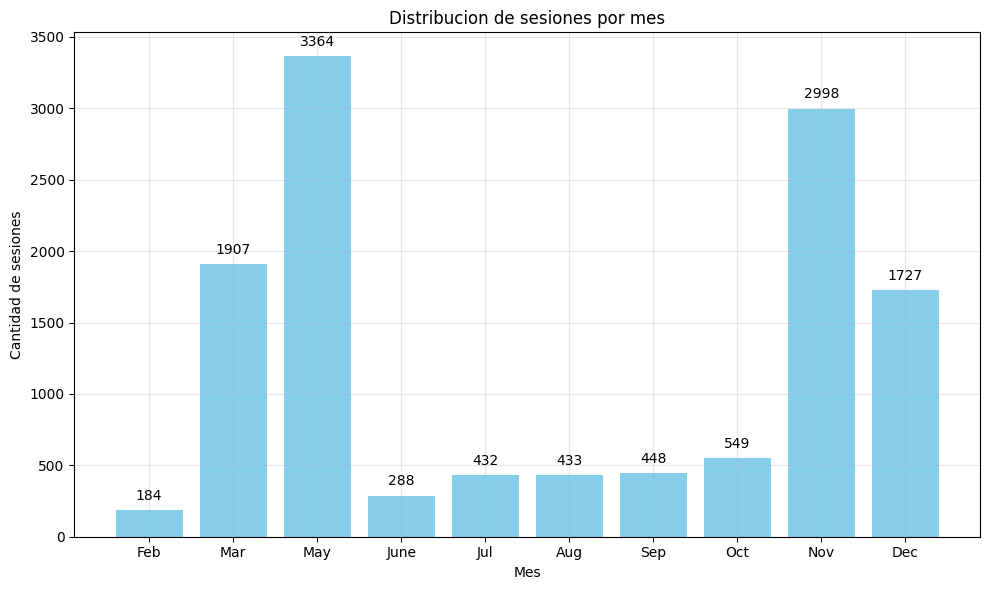

In [42]:
# Contar frecuencias por mes
month_counts = dataset_compras["Month"].value_counts().reindex([
    "Feb", "Mar", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], fill_value=0)

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(month_counts.index, month_counts.values, color = ["skyblue"])
plt.title("Distribucion de sesiones por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de sesiones")
plt.xticks(rotation=0)

# etiquetas de valor encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f"{int(height)}", ha="center", va="bottom", fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Luego optamos por visualizar a traves de histogramas, la distribucion (en general) de cada variable cuantitativa. Es muy importante marcar que los ultimos 4 graficos no tienen sentido, porque como ya mencionamos esas variables son categoricas (en la seccion de limpieza y pre-procesamiento se convertiran a categoricas). 

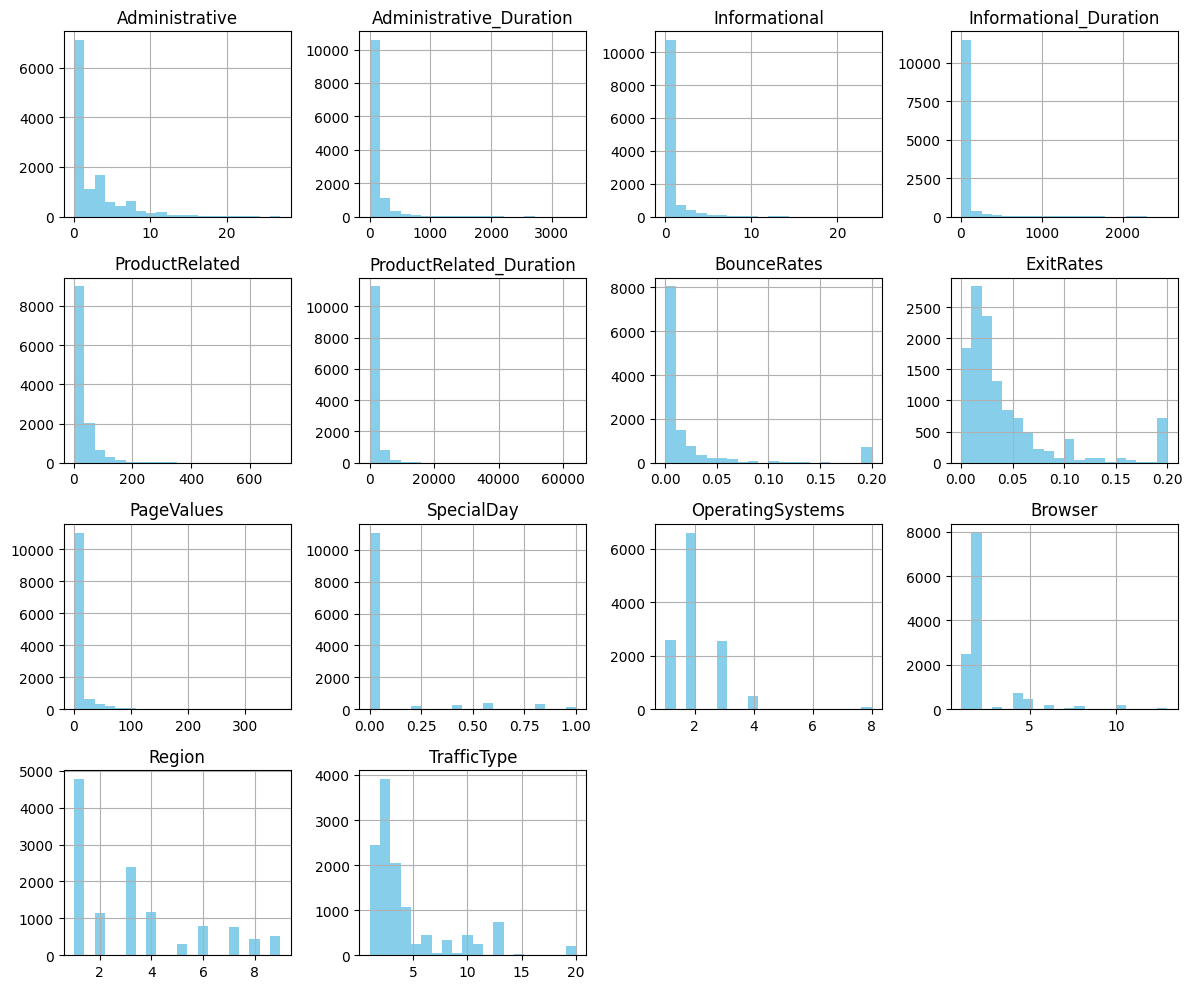

In [43]:
dataset_compras.hist(figsize=(12, 10), bins=20,color = ["skyblue"])
plt.tight_layout()
plt.show()

#### Limpieza y pre-procesamiento
- eliminacion de repetidos

In [44]:
# Eliminar duplicados (exactamente los mismos valores en cada columna)
df = dataset_compras.drop_duplicates(keep="first")
print(f"Se eliminaron {len(dataset_compras) - len(df)} registros duplicados")

Se eliminaron 125 registros duplicados


- conversion de variables cuantitativa a categoricas (OperatingSystem, Browser, Region, TrafficType)

In [45]:
# Conversion de cuantitativas a categoricas.
categoricas = ["OperatingSystems", "Browser", "Region", "TrafficType"]
for col in categoricas:
    df.loc[:, col] = df[col].astype("category")


- correccion de inconsistencias con imputacion de valores por media

In [46]:
df = df.copy()
    
# Imputacion de valores inconsistentes por media (ponderada luego)
for tipo_pagina in ["Administrative", "Informational", "ProductRelated"]:
    duration = f"{tipo_pagina}_Duration"

    # Identificar inconsistencias
    inconsistencias = (df[tipo_pagina] > 0) & (df[duration] == 0)
    if inconsistencias.sum() > 0: 
        duracion_promedio = df[ (df[tipo_pagina] > 0) & (df[duration] > 0) ][duration].mean()
            
        # Para todas las filas donde inconsistencias sea True, en la columna duration, asigna el nuevo valor.
        df.loc[inconsistencias, duration] = duracion_promedio * 0.5

- dos columnas booleanas cambiadas a binarias

In [47]:
# Convertir booleanos a binarios.
df["Weekend"] = df["Weekend"].astype(int)
df["Revenue"] = df["Revenue"].astype(int)

#### Planteo de Hipotesis : Univariadas

##### Hipotesis 1 : “La gran mayoría de las sesiones ocurren en fechas cercanas a dias festivos (SpecialDay = 0), lo que indica que el tráfico está fuertemente impulsado por las oportunidades de mercado relacionadas a estas fechas.” 

Total de sesiones: 12205
Sesiones con SpecialDay = 0: 10956
Proporcion de sesiones cerca de dias festivos: 89.8%

Distribucion de SpeialDay:
SpecialDay
0.0    10956
0.2      178
0.4      243
0.6      350
0.8      324
1.0      154
Name: count, dtype: int64


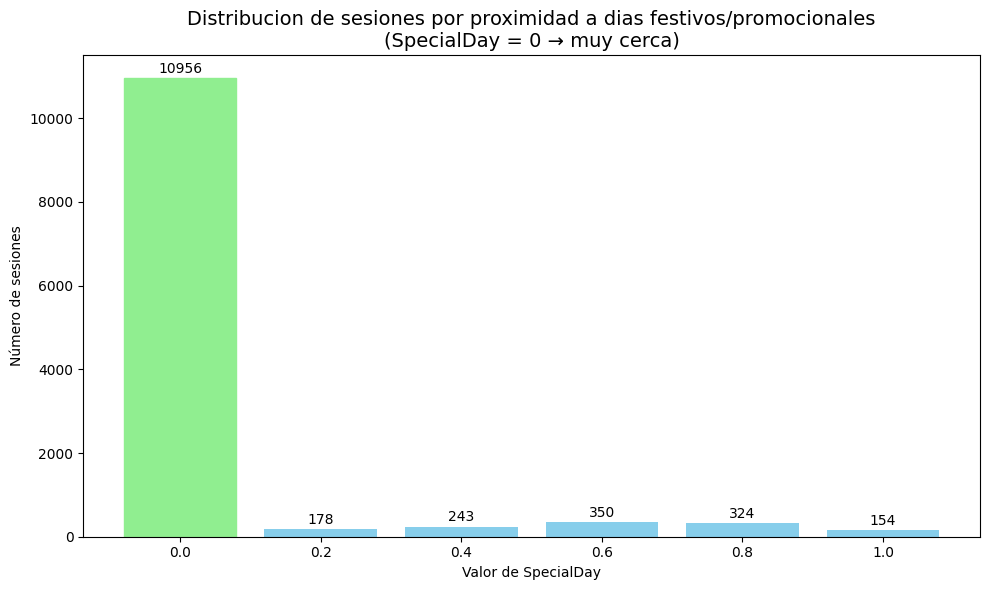

In [48]:
# Proporcin de sesiones con SpecialDay = 0 (cerca de día festivo)
prop_cerca_festivo = (df["SpecialDay"] == 0).mean()
total_sesiones = len(df)
specialday_counts = df["SpecialDay"].value_counts().sort_index()
print(f"Total de sesiones: {total_sesiones}")
print(f"Sesiones con SpecialDay = 0: {(df["SpecialDay"] == 0).sum()}")
print(f"Proporcion de sesiones cerca de dias festivos: {prop_cerca_festivo:.1%}")

print("\nDistribucion de SpeialDay:")
print(df["SpecialDay"].value_counts().sort_index())


# Crear grafico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(specialday_counts.index.astype(str), specialday_counts.values, color="skyblue")
plt.title("Distribucion de sesiones por proximidad a dias festivos/promocionales\n(SpecialDay = 0 → muy cerca)", fontsize=14)
plt.xlabel("Valor de SpecialDay")
plt.ylabel("Número de sesiones")
plt.xticks(rotation=0)

# etiquetas de valor encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f"{int(height)}", ha="center", va="bottom", fontsize=10)

# Resaltar la barra de SpecialDay = 0
bars[0].set_color("lightgreen")

plt.tight_layout()
plt.show()


##### Hipotesis 2 : "La mayoría de las compras están asociadas a sesiones de usuarios que ya visitaron el sitio y tienen experiencia previa"



COMPRAS REALIZADAS POR TIPO DE VISITANTE
Returning_Visitor: 1470 compras (77.0%)
New_Visitor: 422 compras (22.1%)
Other: 16 compras (0.8%)

TOTAL: 1908 compras analizadas


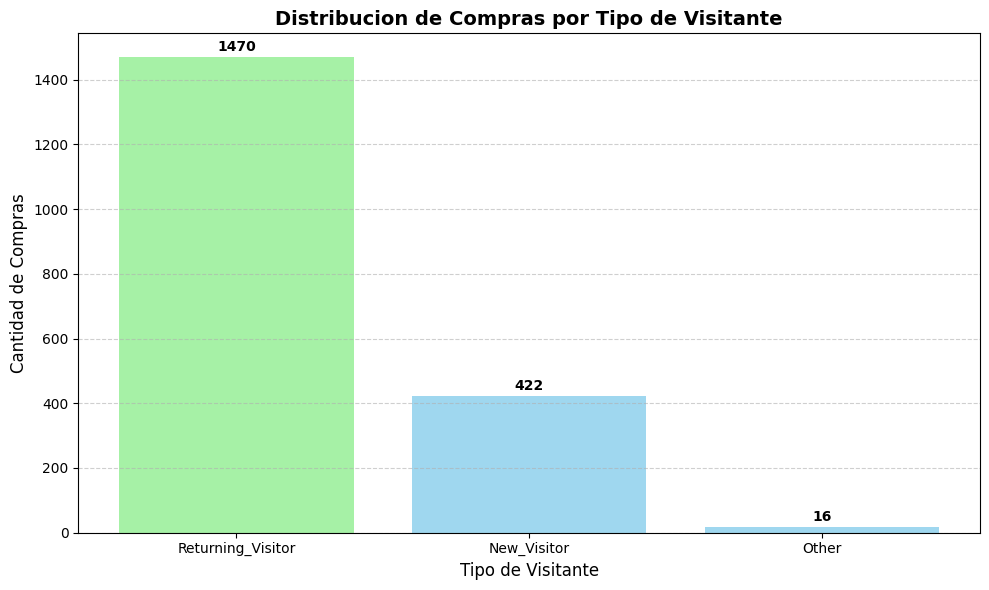

In [49]:
#Filtrar solo las sesiones que resultaron en compra
compras_df = df[df["Revenue"] == True]

# Contar las compras por tipo de visitante
compras_por_tipo = compras_df["VisitorType"].value_counts()
total_compras = len(compras_df)

print("COMPRAS REALIZADAS POR TIPO DE VISITANTE")

for tipo, cantidad in compras_por_tipo.items():
    porcentaje = (cantidad / total_compras) * 100
    print(f"{tipo}: {cantidad} compras ({porcentaje:.1f}%)")

print(f"\nTOTAL: {total_compras} compras analizadas")

# Crear el grafico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(compras_por_tipo.index, compras_por_tipo.values, color=["lightgreen", "skyblue", "skyblue"], alpha=0.8)

# etiquetas de valor
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 10,
             f"{int(height)}",
             ha="center", va="bottom",
             fontweight="bold")

plt.title("Distribucion de Compras por Tipo de Visitante", fontsize=14, fontweight="bold")
plt.xlabel("Tipo de Visitante", fontsize=12)
plt.ylabel("Cantidad de Compras", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


#### Planteo de Hipotesis : Bivariadas

##### Hipótesis 3 : El ultimo trimestre del anio es donde se registran mas sesiones finalizadas en compra.


- Test de chi-cuadrado de bondad de ajuste. Lo esperado es que las distribuciones sean iguales.


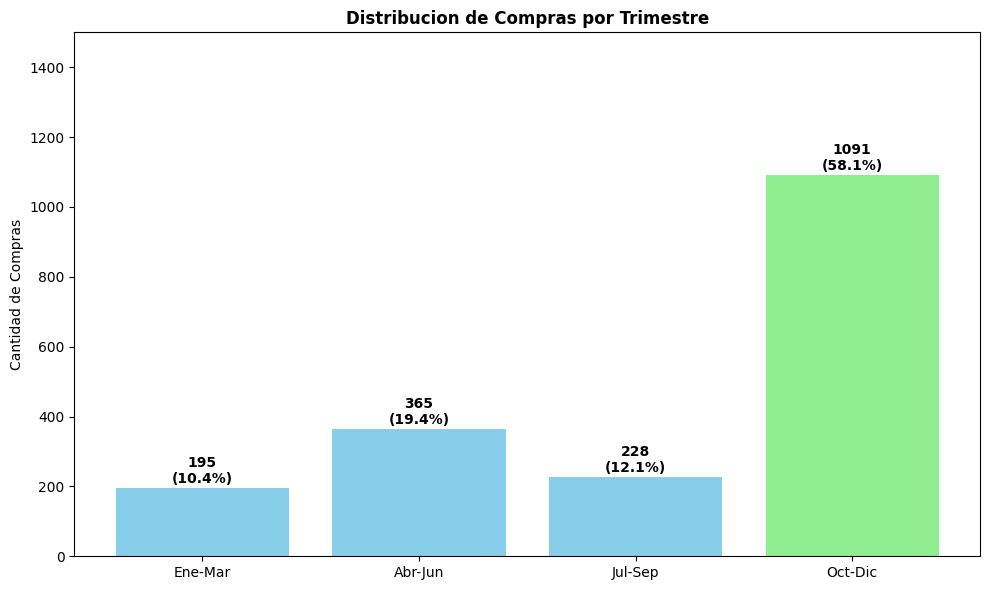

In [50]:
# definir trimestres
trimestre_map = {
    "Jan": "Ene-Mar", "Feb": "Ene-Mar", "Mar": "Ene-Mar",
    "Apr": "Abr-Jun", "May": "Abr-Jun", "Jun": "Abr-Jun", 
    "Jul": "Jul-Sep", "Aug": "Jul-Sep", "Sep": "Jul-Sep",
    "Oct": "Oct-Dic", "Nov": "Oct-Dic", "Dec": "Oct-Dic"
}

# Agrupar compras por trimestre
compras_trimestre = df[df["Revenue"] == True]["Month"].map(trimestre_map).value_counts().reindex(["Ene-Mar", "Abr-Jun", "Jul-Sep", "Oct-Dic"])
porcentajes = (compras_trimestre / compras_trimestre.sum() * 100).round(1)

plt.figure(figsize=(10, 6))
bars = plt.bar(compras_trimestre.index, compras_trimestre.values, color=["skyblue", "skyblue", "skyblue", "lightgreen"])
plt.title("Distribucion de Compras por Trimestre", fontweight="bold")
plt.ylabel("Cantidad de Compras")
plt.ylim(0, 1500)

for bar, valor, porcentaje in zip(bars, compras_trimestre.values, porcentajes.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f"{valor}\n({porcentaje}%)", ha="center", va="bottom", fontweight="bold")
plt.tight_layout()
plt.show()


In [51]:
# test
print(f"\nTEST CHI-CUADRADO:")
print("="*30)

# Esperado: distribucion uniforme = 25% cada trimestre
esperado = [compras_trimestre.sum() / 4] * 4
observado = compras_trimestre.values

chi2, p_value = stats.chisquare(observado, esperado)

print(f"Estadistico: {chi2:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"Nivel de significancia alfa = 0.05")


print(f"\nCONCLUSION:")
if p_value < 0.05:
    print("Se RECHAZA la hipotesis nula")
    print("Existen diferencias significativas entre trimestres")

else:
    print("NO se rechaza la hipotesis nula")
    print("NO hay diferencias significativas entre trimestres")




TEST CHI-CUADRADO:
Estadistico: 1130.0793
p-value: 0.000000
Nivel de significancia alfa = 0.05

CONCLUSION:
Se RECHAZA la hipotesis nula
Existen diferencias significativas entre trimestres


##### Hipotesis 4: "Entre las sesiones que resultaron en compra, y un alto valor de PageValues se corresponde con que se visitaron muchas paginas o hubo una exploracion profunda del sitio"

Las sesiones de compra valiosas (alto PageValues) se caracterizan por una exploracion profunda del sitio (valor alto de ProductRelated)




Correlación (Pearson) entre PageValues y ProductRelated (solo compras): -0.1778

--- Parte 1: Correlación de Spearman (Mide relación monótona) ---
Correlación Spearman (PageValues vs ProductRelated): -0.2089

--- Parte 2: Análisis con PageValues como variable Cualitativa (Box Plots) ---


Text(0, 0.5, 'Páginas de Producto Visitadas')

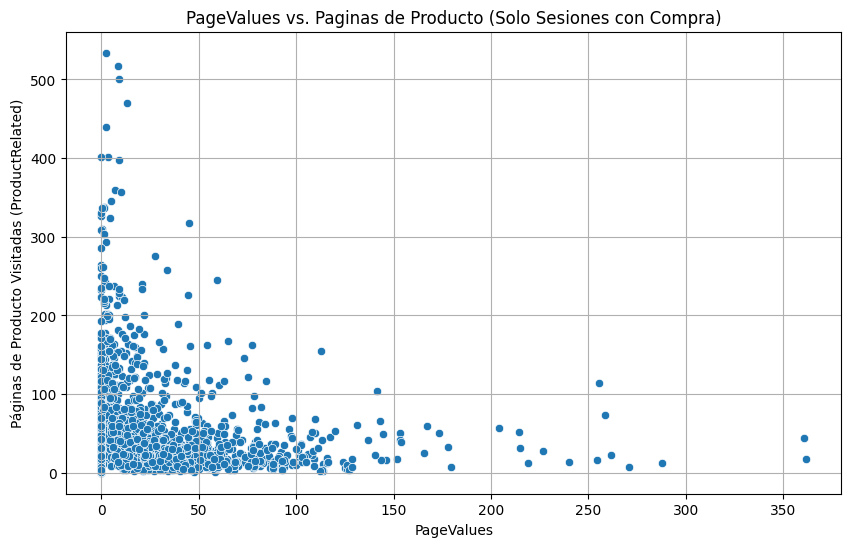

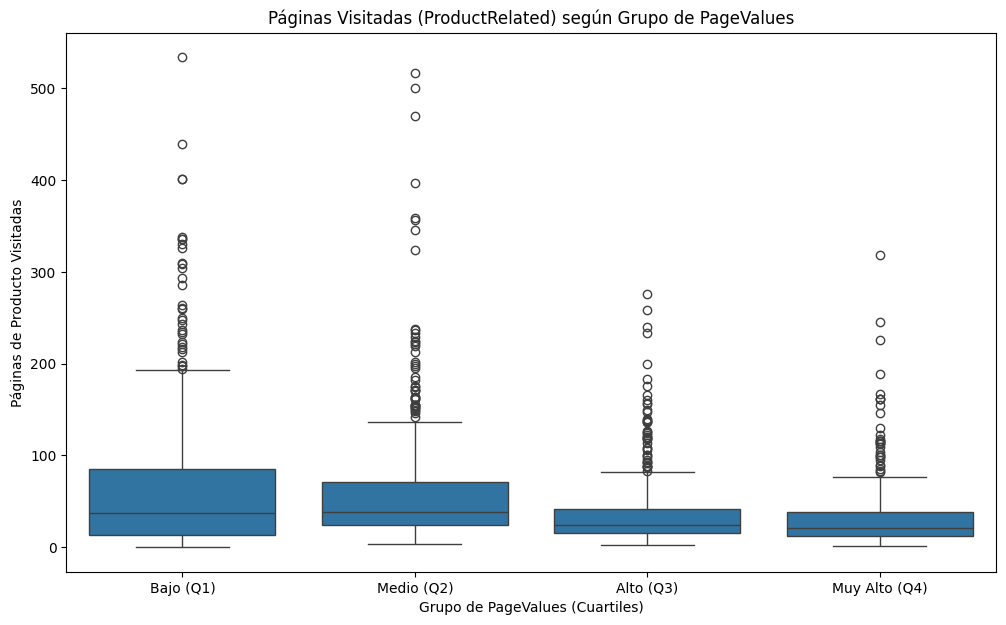

In [52]:
df_compra = df[df["Revenue"] == 1].copy()

correlacion = df_compra["PageValues"].corr(df_compra["ProductRelated"])
print(f"Correlación (Pearson) entre PageValues y ProductRelated (solo compras): {correlacion:.4f}")

# Creamos el gráfico de dispersión (visto en Práctica 5)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_compra, x="PageValues", y="ProductRelated")
plt.title("PageValues vs. Paginas de Producto (Solo Sesiones con Compra)")
plt.xlabel("PageValues")
plt.ylabel("Páginas de Producto Visitadas (ProductRelated)")
plt.grid(True)


# --- PARTE 1: CORRELACIÓN DE SPEARMAN ---
print("\n--- Parte 1: Correlación de Spearman (Mide relación monótona) ---")

    # Correlación Spearman: PageValues vs. ProductRelated (Páginas)
corr_paginas_s = df_compra["PageValues"].corr(
    df_compra["ProductRelated"], 
    method="spearman"
)
print(f"Correlación Spearman (PageValues vs ProductRelated): {corr_paginas_s:.4f}")


# --- PARTE 2: BOX PLOTS (CON PAGEVALUES CUALITATIVA) ---
print("\n--- Parte 2: Análisis con PageValues como variable Cualitativa (Box Plots) ---")

# Discretizamos PageValues en 4 cuartiles
df_compra["PageValues_Grupo"] = pd.qcut(
    df_compra["PageValues"], 
    q=4, 
    labels=["Bajo (Q1)", "Medio (Q2)", "Alto (Q3)", "Muy Alto (Q4)"]
)
    
# Gráfico 1: Box Plot (PageValues Grupo vs. ProductRelated)
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df_compra, 
    x="PageValues_Grupo", 
    y="ProductRelated", 
    order=["Bajo (Q1)", "Medio (Q2)", "Alto (Q3)", "Muy Alto (Q4)"]
)
plt.title("Páginas Visitadas (ProductRelated) según Grupo de PageValues")
plt.xlabel("Grupo de PageValues (Cuartiles)")
plt.ylabel("Páginas de Producto Visitadas")



La hipótesis NO se cumple.

¿Por qué?

Los datos muestran que las sesiones con mayor valor de PageValues (las más valiosas) NO son las que visitaron más páginas de producto.

En el gráfico de dispersión, ves que los puntos con PageValues altos (hacia la derecha) están en su mayoría en la parte baja del eje vertical (pocas páginas visitadas).
El boxplot confirma que, en promedio, los grupos con PageValues "Alto" y "Muy Alto" tienen menos páginas visitadas que los grupos "Bajo" y "Medio".
En otras palabras:

No es necesario visitar muchas páginas para generar un alto valor.
Muchas compras valiosas (alta PageValues) ocurren después de una navegación rápida o focalizada, no tras una exploración larga. 

“No necesitamos que los usuarios naveguen mucho para comprar. De hecho, las compras más valiosas a menudo vienen de quienes encuentran rápido lo que buscan. Nuestro sitio debe enfocarse en hacer que la experiencia sea rápida y directa, no en hacer que la gente ‘exploré’ más.”

##### Hipotesis 5: "El tiempo promedio de las sesiones en paginas administrativas (inicios de sesion, configuracion,proceso de pago, etc) es el mismo para sesiones que terminan en compra y sesiones que no resultan en compra"

Se sospecha que si una sesion pasa un tiempo excesivo en secciones Administrativas y ademas la sesion no termina en compra, quiza porque el usuario esta "atascado" (friccion operativa)

In [53]:
from scipy import stats

# Separar los datos en dos grupos
grupo_no_compra = df[df["Revenue"] == False]["Administrative_Duration"]
grupo_compra = df[df["Revenue"] == True]["Administrative_Duration"]

print("📊 TEST DE MANN-WHITNEY U - ADMINISTRATIVE_DURATION")
print("="*60)

# Estadísticas descriptivas
print("🔹 ESTADÍSTICAS DESCRIPTIVAS:")
print(f"   NO COMPRARON (n={len(grupo_no_compra)}):")
print(f"      • Media: {grupo_no_compra.mean():.2f} segundos")
print(f"      • Mediana: {grupo_no_compra.median():.2f} segundos")
print(f"      • Desviación: {grupo_no_compra.std():.2f} segundos")

print(f"\n   COMPRARON (n={len(grupo_compra)}):")
print(f"      • Media: {grupo_compra.mean():.2f} segundos")
print(f"      • Mediana: {grupo_compra.median():.2f} segundos")
print(f"      • Desviación: {grupo_compra.std():.2f} segundos")

# Realizar el test de Mann-Whitney U
stat, p_value = stats.mannwhitneyu(grupo_no_compra, grupo_compra, alternative="two-sided")

print(f"\n🎯 RESULTADO DEL TEST MANN-WHITNEY U:")
print(f"   • Estadístico U: {stat:.2f}")
print(f"   • p-value: {p_value:.6f}")
print(f"   • Nivel de significancia (α): 0.05")

print(f"\n📈 INTERPRETACIÓN:")
print(f"   • Hipótesis Nula (H₀): El tiempo en páginas administrativas es igual en ambos grupos")
print(f"   • Hipótesis Alternativa (H₁): El tiempo en páginas administrativas es diferente")

if p_value < 0.05:
    print(f"   • ✅ Se RECHAZA la hipótesis nula (p < 0.05)")
    print(f"   • 📊 Existe diferencia estadísticamente significativa")
    if grupo_compra.median() > grupo_no_compra.median():
        print(f"   • ⬆️  Las sesiones que COMPRAN pasan MÁS tiempo en páginas administrativas")
    else:
        print(f"   • ⬇️  Las sesiones que COMPRAN pasan MENOS tiempo en páginas administrativas")
else:
    print(f"   • ❌ NO se rechaza la hipótesis nula (p ≥ 0.05)")
    print(f"   • 📊 NO existe diferencia estadísticamente significativa")
    print(f"   • El tiempo en páginas administrativas es similar en ambos grupos")

print(f"\n💡 CONCLUSIÓN FINAL:")
if p_value < 0.05:
    print("   La evidencia sugiere que el tiempo en páginas administrativas")
    print("   influye en la decisión de compra del usuario")
else:
    print("   No hay evidencia suficiente para afirmar que el tiempo en")
    print("   páginas administrativas afecta la decisión de compra")

📊 TEST DE MANN-WHITNEY U - ADMINISTRATIVE_DURATION
🔹 ESTADÍSTICAS DESCRIPTIVAS:
   NO COMPRARON (n=10297):
      • Media: 75.40 segundos
      • Mediana: 3.00 segundos
      • Desviación: 171.70 segundos

   COMPRARON (n=1908):
      • Media: 120.86 segundos
      • Mediana: 56.80 segundos
      • Desviación: 200.55 segundos

🎯 RESULTADO DEL TEST MANN-WHITNEY U:
   • Estadístico U: 7372637.00
   • p-value: 0.000000
   • Nivel de significancia (α): 0.05

📈 INTERPRETACIÓN:
   • Hipótesis Nula (H₀): El tiempo en páginas administrativas es igual en ambos grupos
   • Hipótesis Alternativa (H₁): El tiempo en páginas administrativas es diferente
   • ✅ Se RECHAZA la hipótesis nula (p < 0.05)
   • 📊 Existe diferencia estadísticamente significativa
   • ⬆️  Las sesiones que COMPRAN pasan MÁS tiempo en páginas administrativas

💡 CONCLUSIÓN FINAL:
   La evidencia sugiere que el tiempo en páginas administrativas
   influye en la decisión de compra del usuario


La hipótesis buscaba comparar la media de la variable cuantitativa Administrative_Duration entre dos grupos independientes (sesiones con Revenue=True y Revenue=False). El test paramétrico ideal es el Test t de Student.

Sin embargo, para usar el Test t, se debe cumplir el supuesto de Normalidad. Como se observó en el análisis univariado y se confirmó mediante el test de Shapiro-Wilk (p-value < 0.05), la variable Administrative_Duration no sigue una distribución normal; presenta un fuerte sesgo.

Al no cumplirse el supuesto de normalidad, se descartó el Test t y se procedió a utilizar su alternativa no paramétrica: el Test de Mann-Whitney U

Se plantearon las siguientes hipótesis:
Hipótesis Nula ($H_0$): El tiempo promedio en páginas administrativas es igual en ambos grupos.
Hipótesis Alternativa ($H_a$): El tiempo promedio en páginas administrativas es diferente entre los grupos.
Se utilizó un nivel de significancia (alfa) de 0.05.
El resultado del Test de Mann-Whitney U arrojó un $p$-value < 0.05. Dado que el $p$-value es menor que nuestro alfa, la evidencia estadística es suficiente para rechazar la Hipótesis Nula ($H_0$).

Se demuestra que existe una diferencia estadísticamente significativa en el tiempo que las sesiones pasan en páginas administrativas (Administrative_Duration) entre aquellas que terminan en compra y aquellas que no.




In [54]:
# Usamos la Mediana porque la distribución no es normal
print(f"Mediana de Administrative_Duration (Compra): {grupo_compra.median():.2f} segundos")
print(f"Mediana de Administrative_Duration (No Compra): {grupo_no_compra.median():.2f} segundos")

# También mostramos la Media para contexto
print(f"\nMedia de Administrative_Duration (Compra): {grupo_compra.mean():.2f} segundos")
print(f"Media de Administrative_Duration (No Compra): {grupo_no_compra.mean():.2f} segundos")

Mediana de Administrative_Duration (Compra): 56.80 segundos
Mediana de Administrative_Duration (No Compra): 3.00 segundos

Media de Administrative_Duration (Compra): 120.86 segundos
Media de Administrative_Duration (No Compra): 75.40 segundos


Se demuestra que existe una diferencia estadísticamente significativa... Específicamente, se observa que las sesiones que terminan en compra pasan, en promedio, más tiempo en páginas administrativas que aquellas que no compran. Esto suponemos que se debe a que las sesiones que compran, tienen que pasar por mas tramos administrativos, como inicios de sesion, registro de tarjetas de pago, confirmaciones de compra, etc"

#### Planteo de Hipotesis : Multivariada 

Comenzamos el analisis realizando un tSNE...(explicar)

In [55]:
"""from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(df.select_dtypes(include=["number"]))

# Mapear VisitorType a colores
visitortype_map = {"New_Visitor": 0, "Returning_Visitor": 1, "Other": 2}
colors = np.array([visitortype_map.get(str(typ), 3) for typ in df["VisitorType"]])

# Graficar
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, alpha=0.7, s=30, cmap="Set1")

# Leyenda
legend_labels = ["New_Visitor", "Returning_Visitor", "Other"]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Tipo de Visitante")

plt.title("t-SNE - Coloreado por Tipo de Visitante")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.show()"""

'from sklearn.manifold import TSNE\nimport matplotlib.pyplot as plt\n\ntsne = TSNE(n_components=2, random_state=42, perplexity=30)\nX_tsne = tsne.fit_transform(df.select_dtypes(include=["number"]))\n\n# Mapear VisitorType a colores\nvisitortype_map = {"New_Visitor": 0, "Returning_Visitor": 1, "Other": 2}\ncolors = np.array([visitortype_map.get(str(typ), 3) for typ in df["VisitorType"]])\n\n# Graficar\nplt.figure(figsize=(12, 8))\nscatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, alpha=0.7, s=30, cmap="Set1")\n\n# Leyenda\nlegend_labels = ["New_Visitor", "Returning_Visitor", "Other"]\nplt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Tipo de Visitante")\n\nplt.title("t-SNE - Coloreado por Tipo de Visitante")\nplt.xlabel("Componente t-SNE 1")\nplt.ylabel("Componente t-SNE 2")\nplt.show()'

In [56]:
"""import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_numeric = df.select_dtypes(include=["number"])

# estandarizamos X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

print(np.mean(X_scaled, axis=0))
print(np.std(X_scaled, axis=0))


# Ahora aplicamos PCA a los datos estandarizados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# graficamos los datos
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.grid(True)
plt.xlabel("Proyección PCA 1")
plt.ylabel("Proyección PCA 2")
plt.title("Proyección del conjunto de datos a 2 dimensiones")
plt.show()"""

'import numpy as np\n\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.decomposition import PCA\n\ndf_numeric = df.select_dtypes(include=["number"])\n\n# estandarizamos X\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(df_numeric)\n\nprint(np.mean(X_scaled, axis=0))\nprint(np.std(X_scaled, axis=0))\n\n\n# Ahora aplicamos PCA a los datos estandarizados\npca = PCA(n_components=2)\nX_pca = pca.fit_transform(X_scaled)\n# graficamos los datos\nplt.scatter(X_pca[:,0], X_pca[:,1])\nplt.grid(True)\nplt.xlabel("Proyección PCA 1")\nplt.ylabel("Proyección PCA 2")\nplt.title("Proyección del conjunto de datos a 2 dimensiones")\nplt.show()'

##### Hipotesis 6: "Existen perfiles de compradores definidos o los compradores se comportan de manera similar"

La hipótesis nula (H0) es que no existen grupos diferenciados y que todas las sesiones de compradores provienen de una única distribución. 
La hipótesis alternativa (H1) es que existen 3 grupos en el dataset que estan definidos por un perfil/tipo de comprador.

Los perfiles de compradores son:
1. Perfil Explorador: Se caracteriza por un valor mas alto en "ProductRelated_Duration", que en "Administrative_Duration" e "Informational_Duration".
2. Perfil Nuevo o Desconfiado: Se caracteriza por valores mas altos en "Informational_Duration" y "Administrative_Duration", que en "ProductRelated_Duration".
3. Perfil Directo: Se caracteriza por un valor mas alto en "Administrative_Duration", comparado con los valores en "ProductRelated_Duration" e "Informational_Duration".







In [57]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos las columnas numéricas para la normalización
numeric_cols = df.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
df.head()

from sklearn.cluster import KMeans

# Separamos las features de las variables de duración
features = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]
X = df[df["Revenue"] == True][features]


# Inicializamos KMeans con 3 clusters según tu hipótesis
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
# Aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(X)
# Obtenemos los clusters a los que fueron asignadas las sesiones
clusters_kmeans = kmeans.predict(X)

# Creamos un DataFrame con las features y los clusters asignados
cluster_df = X.copy()
cluster_df["Cluster"] = clusters_kmeans


# Imprimimos las sesiones de cada cluster
for cluster_num in range(3):
    print(f"\nCluster {cluster_num}:")
    print(f"Sesiones: {len(cluster_df[cluster_df["Cluster"] == cluster_num])}")
    # Mostramos las características promedio de cada cluster
    print("Características promedio:")
    print(cluster_df[cluster_df["Cluster"] == cluster_num][features].mean())


Cluster 0:
Sesiones: 1681
Características promedio:
Administrative_Duration    0.020515
Informational_Duration     0.010456
ProductRelated_Duration    0.025056
dtype: float64

Cluster 1:
Sesiones: 68
Características promedio:
Administrative_Duration    0.080659
Informational_Duration     0.312545
ProductRelated_Duration    0.072644
dtype: float64

Cluster 2:
Sesiones: 159
Características promedio:
Administrative_Duration    0.175355
Informational_Duration     0.037436
ProductRelated_Duration    0.056405
dtype: float64


Cluster 0:
ProductRelated_Duration (0.025) es el valor más alto de los tres.
Conclusión: Este cluster se alinea perfectamente con "Perfil Explorador", ya que son los usuarios que, en promedio, pasan más tiempo en páginas de productos.

Cluster 1:
Informational_Duration (0.312) es drásticamente más alto que los otros dos.
Conclusión: Este cluster representa a "Perfil Nuevo o Desconfiado". Son usuarios que pasan mucho tiempo en páginas informativas, probablemente buscando información, ayuda o validando la confianza del sitio antes de comprar.

Cluster 2:
Administrative_Duration (0.175) es notablemente el valor más alto.
Conclusión: Este cluster encaja con "Perfil Directo". Son usuarios que pasan la mayor parte de su tiempo en tareas administrativas, como iniciar sesión, configurar la cuenta o, más probablemente, en el proceso de pago.

Interpretamos que los resultados del clustering respaldan fuertemente la hipotesis planteada, el algoritmo K-Means encontro los 3 grupos que se corresponden con los teorizados. Sin embargo, aunque la interpretacion es clara, hay que darle un rigor estadistico para confirmar que las diferencias entre los promedios son estadisticamente significativas.

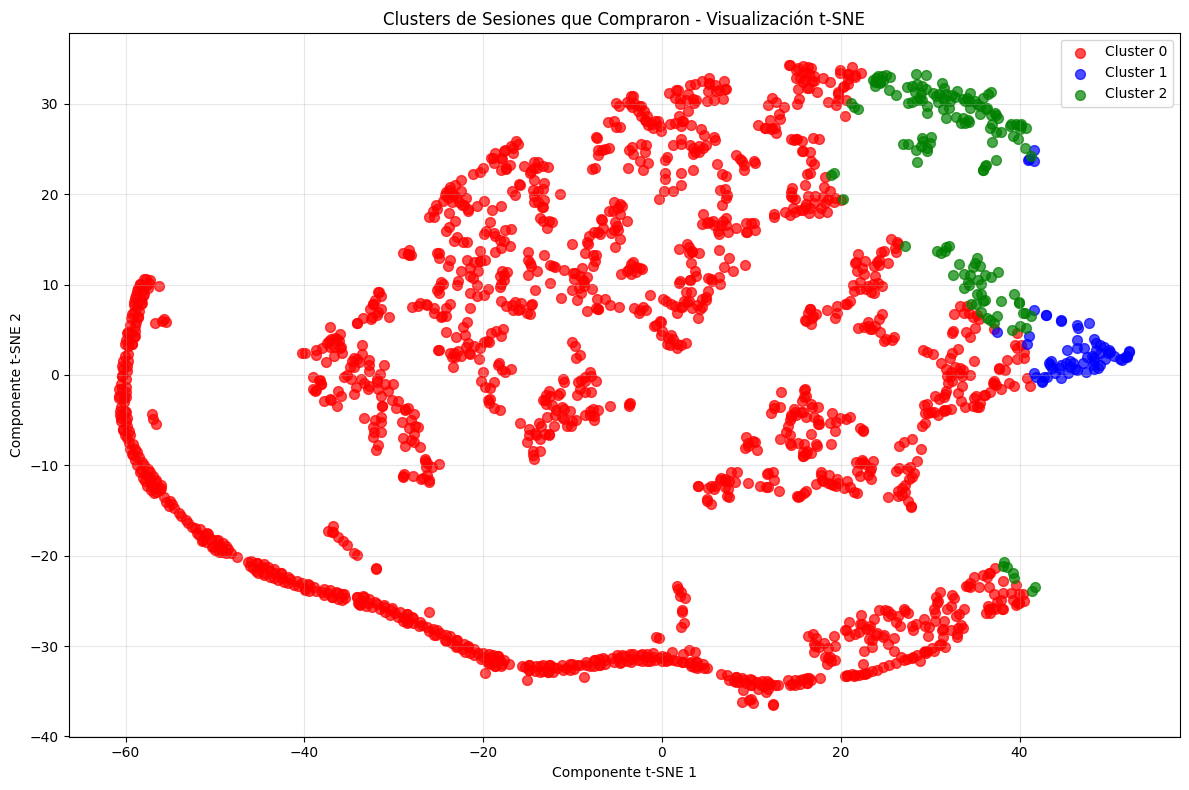

In [58]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X)  # X ya contiene solo Revenue=True

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({
    "x": tsne_results[:, 0], 
    "y": tsne_results[:, 1], 
    "Cluster": clusters_kmeans,
    "Session": df[df["Revenue"] == True].index
})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(12, 8))
colors = ["red", "blue", "green"]  # 3 colores para 3 clusters

for cluster_num in range(3):
    cluster_data = tsne_df[tsne_df["Cluster"] == cluster_num]
    plt.scatter(cluster_data["x"], cluster_data["y"], 
                color=colors[cluster_num], 
                label=f"Cluster {cluster_num}",
                alpha=0.7,
                s=50)

plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.title("Clusters de Sesiones que Compraron - Visualización t-SNE")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [59]:
import scipy.stats as stats

# El DataFrame "cluster_df" ya contiene las features y la columna "Cluster"

# Lista de características para analizar
features_to_test = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]
alpha = 0.05

for feature in features_to_test:
    print(f"--- Análisis para: {feature} ---")
    
    # Hipótesis
    print("Hipótesis Nula (H0): Las medias de la duración son iguales en los tres clusters.")
    print("Hipótesis Alternativa (H1): Al menos una de las medias de la duración es diferente.")
    print("-" * 30)

    # Extraer los datos de cada cluster para la feature actual
    cluster0 = cluster_df[cluster_df["Cluster"] == 0][feature]
    cluster1 = cluster_df[cluster_df["Cluster"] == 1][feature]
    cluster2 = cluster_df[cluster_df["Cluster"] == 2][feature]

    # Realizar el test ANOVA
    f_statistic, p_value = stats.f_oneway(cluster0, cluster1, cluster2)

    # Imprimir resultados
    print(f"Estadístico F: {f_statistic:.4f}")
    print(f"P-value: {p_value}")

    # Conclusión
    if p_value < alpha:
        print(f"Conclusión: Se rechaza la hipótesis nula (p < {alpha}).")
        print("Existe una diferencia estadísticamente significativa en las medias de los grupos.")
    else:
        print(f"Conclusión: No se puede rechazar la hipótesis nula (p >= {alpha}).")
        print("No hay evidencia de una diferencia significativa en las medias de los grupos.")
    
    print("\n")

--- Análisis para: Administrative_Duration ---
Hipótesis Nula (H0): Las medias de la duración son iguales en los tres clusters.
Hipótesis Alternativa (H1): Al menos una de las medias de la duración es diferente.
------------------------------
Estadístico F: 1145.9313
P-value: 0.0
Conclusión: Se rechaza la hipótesis nula (p < 0.05).
Existe una diferencia estadísticamente significativa en las medias de los grupos.


--- Análisis para: Informational_Duration ---
Hipótesis Nula (H0): Las medias de la duración son iguales en los tres clusters.
Hipótesis Alternativa (H1): Al menos una de las medias de la duración es diferente.
------------------------------
Estadístico F: 2176.5187
P-value: 0.0
Conclusión: Se rechaza la hipótesis nula (p < 0.05).
Existe una diferencia estadísticamente significativa en las medias de los grupos.


--- Análisis para: ProductRelated_Duration ---
Hipótesis Nula (H0): Las medias de la duración son iguales en los tres clusters.
Hipótesis Alternativa (H1): Al menos 

Validación Estadística de los Clusters con ANOVA

Para confirmar que los perfiles de usuario (clusters) que hemos identificado son genuinamente distintos, realizamos un **Análisis de Varianza (ANOVA)**. Este test nos permite determinar si las diferencias observadas en las duraciones promedio en paginas (`Administrative`, `Informational`, `ProductRelated`) entre los tres clusters son estadísticamente significativas o si podrían deberse al azar.

Para cada una de las tres variables de duración, planteamos las siguientes hipótesis:

*   **Hipótesis Nula ($H_0$)**: Las medias de la duración son iguales en los tres clusters. No hay diferencia real entre los grupos.
*   **Hipótesis Alternativa ($H_1$)**: Al menos una de las medias de la duración es diferente. Los grupos no se comportan de la misma manera.

El **p-value** obtenido en el test es menor que nuestro nivel de significancia (alpha 0.05), rechazamos la hipótesis nula. Esto nos daría una fuerte evidencia de que los clusters representan perfiles de comportamiento verdaderamente distintos.

In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# El DataFrame "cluster_df" ya contiene las features y la columna "Cluster"

# Lista de características para analizar
features_to_test = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]

print("--- Test de Tukey HSD para comparaciones por pares ---")
print("Este test nos dice qué pares de clusters son significativamente diferentes entre sí.")
print("Si reject es True, la diferencia entre las medias de esos dos grupos es estadísticamente significativa.")
print("="*80)

for feature in features_to_test:
    print(f"\n\n--- Análisis para: {feature} ---")

    # Realizar el test de Tukey HSD
    tukey_result = pairwise_tukeyhsd(
        endog=cluster_df[feature],  # La variable que estamos midiendo
        groups=cluster_df["Cluster"], # Los grupos que estamos comparando
        alpha=0.05
    )

    # Imprimir el resumen de los resultados
    print(tukey_result)
    print("-" * 80)


--- Test de Tukey HSD para comparaciones por pares ---
Este test nos dice qué pares de clusters son significativamente diferentes entre sí.
Si reject es True, la diferencia entre las medias de esos dos grupos es estadísticamente significativa.


--- Análisis para: Administrative_Duration ---
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.0601   0.0 0.0486 0.0717   True
     0      2   0.1548   0.0 0.1471 0.1626   True
     1      2   0.0947   0.0 0.0812 0.1082   True
-------------------------------------------------
--------------------------------------------------------------------------------


--- Análisis para: Informational_Duration ---
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   0.3021   0.0  0.2913  0.3129   True
     0      2    0

Los resultados del test de Tukey proporcionan una fuerte validación estadística a la hipótesis. No solo existen 3 grupos, sino que cada grupo tiene un comportamiento de navegación único y significativamente diferente de los otros dos en todas las dimensiones de tiempo analizadas.

Esto confirma que los perfiles de comprador que teorizamos ("Explorador", "Nuevo o Desconfiado" y "Directo") no son una casualidad, sino que representan segmentos de usuarios reales y medibles.

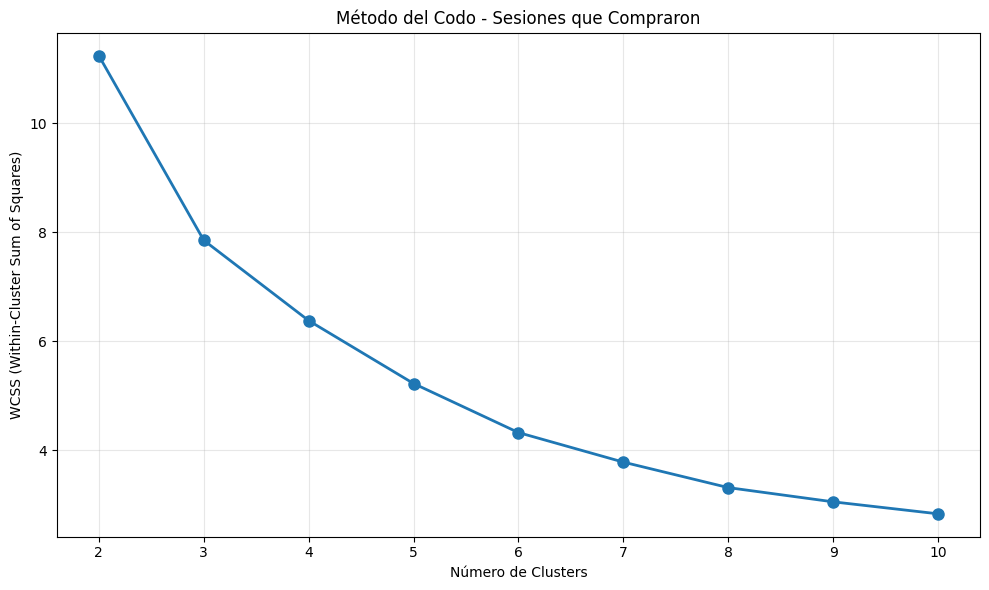

📊 VALORES DE WCSS:
K = 2: WCSS = 11.23
K = 3: WCSS = 7.85
K = 4: WCSS = 6.38
K = 5: WCSS = 5.23
K = 6: WCSS = 4.33
K = 7: WCSS = 3.79
K = 8: WCSS = 3.32
K = 9: WCSS = 3.06
K = 10: WCSS = 2.84


In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculamos K-Means para cada número de clusters y guardamos WCSS
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)  # X contiene solo Revenue=True
    wcss.append(kmeans.inertia_)

# Graficamos el elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker="o", linewidth=2, markersize=8)
plt.title("Método del Codo - Sesiones que Compraron")
plt.grid(True, alpha=0.3)
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(range(2, 11))
plt.tight_layout()
plt.show()

# Mostramos valores numéricos para mejor análisis
print("📊 VALORES DE WCSS:")
for k, wcss_val in zip(range(2, 11), wcss):
    print(f"K = {k}: WCSS = {wcss_val:.2f}")

Elección del Número de Clusters (K)

Para determinar el número óptimo de clusters, se utilizó el **Método del Codo (Elbow Method)**, que analiza la inercia (WCSS) a medida que aumenta el número de clusters (K). Los resultados muestran una reducción significativa de la inercia al pasar de K=2 (WCSS=11.23) a K=3 (WCSS=7.85). A partir de K=3, la disminución de la inercia se vuelve menos pronunciada, formando un "codo" en el gráfico.

Aunque el método del codo es una guía, la elección final de K=3 se valida por dos razones clave:

1.  **Interpretabilidad**: Los 3 clusters generados se alinean perfectamente con los perfiles de comprador teóricos ("Explorador", "Nuevo o Desconfiado" y "Directo"), proporcionando un significado claro y accionable.
2.  **Validación Estadística**: Tanto la visualización con t-SNE como los tests ANOVA y Tukey confirmaron que estos 3 grupos son visualmente separables y estadísticamente distintos.

Por lo tanto, K=3 se considera la elección óptima, ya que ofrece el mejor equilibrio entre la simplicidad del modelo y su capacidad para explicar patrones de comportamiento significativos en los datos.